# CONTROLE CONTINU DE DEEP LEARNING

## ONFIANG KIRK BRADLEY - B3 JOUR

### Nettoyage du jeu de données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
data = pd.read_csv("diamonds.csv")
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
data.drop(columns=["Unnamed: 0"], inplace=True)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [5]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
data.duplicated().value_counts()

False    53794
True       146
Name: count, dtype: int64

In [7]:
data.drop_duplicates()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Text(0.5, 1.0, 'Matrice de correlation')

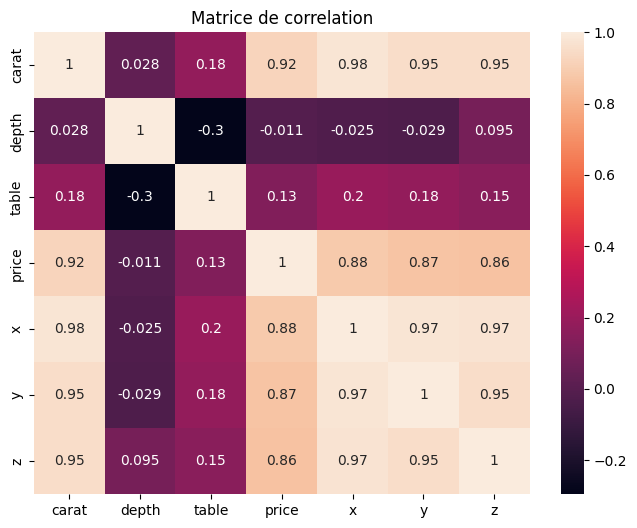

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(data.select_dtypes(include= ['number']).corr(), annot = True )
plt.title("Matrice de correlation")

C:\Users\SANTI\AppData\Local\Temp\ipykernel_12472\4162361693.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="color", y="price", data=data, palette='viridis')


<Axes: xlabel='color', ylabel='price'>

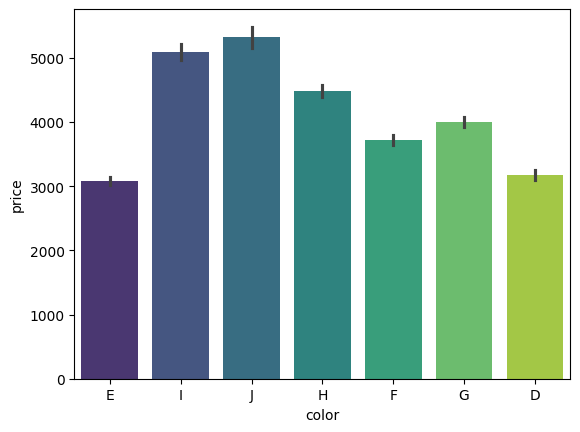

In [9]:
sns.barplot(x="color", y="price", data=data, palette='viridis')

<Axes: xlabel='table'>

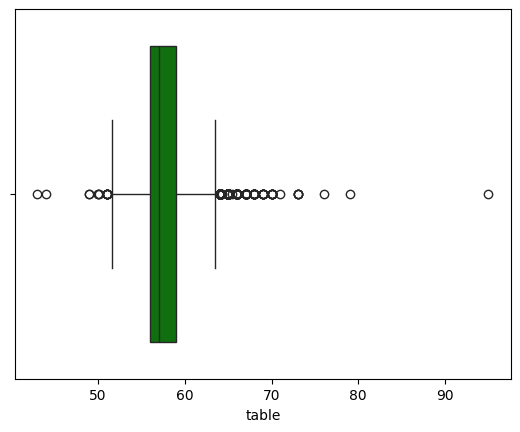

In [10]:
sns.boxplot(x='table',data=data, color="green")

In [11]:
#Traitement des outliers
# Fonction pour détecter et remplacer les valeurs aberrantes avec les Bounds
def replace_outliers(df):
    for col in df.select_dtypes(include=['number']).columns:  # Only process numeric columns 
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col]) 

In [12]:
replace_outliers(data)

In [13]:
data.to_csv("diamonds_clean_2.csv", index=False)

### Création du modèle de Deep Learning (ANN)

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, cohen_kappa_score, matthews_corrcoef

In [15]:
# Fonction d'encodage par fréquence pour les colonnes non cibles
def encodage(colonne, new_colonne):
    fe = data.groupby(colonne).size() / len(data)
    data.loc[:, new_colonne] = data[colonne].map(fe.round(6))
    data.drop(colonne, axis=1, inplace=True)

# Appliquer l'encodage de fréquence pour les variables indépendantes
encodage("color", "new_color")
encodage("clarity", "new_clarity")

# Pour la cible cut, utilisation de LabelEncoder 
label_encoder = LabelEncoder()
data["new_cut"] = label_encoder.fit_transform(data["cut"])

data.drop("cut", axis=1, inplace=True)

# Vérifier le résultat
data.head()

,carat,depth,table,price,x,y,z,new_color,new_clarity,new_cut
0,0.23,61.50,55.0,326.0,3.95,3.98,2.43,0.181628,0.170449,2
1,0.21,59.80,61.0,326.0,3.89,3.84,2.31,0.181628,0.242214,3
2,0.23,58.75,63.5,327.0,4.05,4.07,2.31,0.181628,0.151483,1
3,0.29,62.40,58.0,334.0,4.20,4.23,2.63,0.100519,0.227253,3
4,0.31,63.30,58.0,335.0,4.34,4.35,2.75,0.052058,0.170449,1


In [16]:
X = data.drop(columns=["new_cut"])
y = data["new_cut"]

In [17]:
X_train , X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [ ]:
# Création du modèle ANN
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Nombre de classes dans 'new_cut'

In [21]:
# Compilation de l'ANN
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [22]:
# Training de l'ANN
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10

1079/1079 [==============================] - 12s 6ms/step - loss: 0.9328 - val_loss: 0.8145
Epoch 2/10
1079/1079 [==============================] - 5s 5ms/step - loss: 0.7824 - val_loss: 0.7714
Epoch 3/10
1079/1079 [==============================] - 5s 5ms/step - loss: 0.7512 - val_loss: 0.7586
Epoch 4/10
1079/1079 [==============================] - 5s 5ms/step - loss: 0.7284 - val_loss: 0.7414
Epoch 5/10
1079/1079 [==============================] - 5s 5ms/step - loss: 0.7006 - val_loss: 0.7030
Epoch 6/10
1079/1079 [==============================] - 8s 7ms/step - loss: 0.6703 - val_loss: 0.6633
Epoch 7/10
1079/1079 [==============================] - 13s 12ms/step - loss: 0.6450 - val_loss: 0.6537
Epoch 8/10
1079/1079 [==============================] - 9s 8ms/step - loss: 0.6309 - val_loss: 0.6372
Epoch 9/10
1079/1079 [==============================] - 11s 10ms/step - loss: 0.6209 - val_loss: 0.6344
Epoch 10/10
1079/1079 [==============================] - 8s 7ms/step - loss:

In [23]:
# Évaluation du modèle
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

338/338 [==============================] - 3s 6ms/step


In [24]:
# Binarisation pour AUC multiclass
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Initialisation d'un tableau pour stocker les résultats
results = []


# Prédiction avec le meilleur modèle optimisé
# Calcul des métriques avec la création d'un dictionnaire
metrics = {
        "Modèle": model,
        "Accuracy": accuracy_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "F1-score": f1_score(y_test, y_pred, average='weighted'),
        "Kappa": cohen_kappa_score(y_test, y_pred),
        "MCC": matthews_corrcoef(y_test, y_pred)
    }

# Affichage des résultats
metrics


{'Modèle': <keras.src.engine.sequential.Sequential at 0x23b284679a0>,
 'Accuracy': 0.7588987764182424,
 'ROC AUC': 0.9337490941553741,
 'Recall': 0.7588987764182424,
 'Precision': 0.7498311600670926,
 'F1-score': 0.7506211596647869,
 'Kappa': 0.658567466282738,
 'MCC': 0.6611072742005312}

In [25]:
# Sauvegarde du modèle ANN sous le format HDF5
model.save("model_ANN_diamonds.h5")

c:\Users\SANTI\Downloads\Virtual_Environments\python\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
